Code interrupted: Max distance


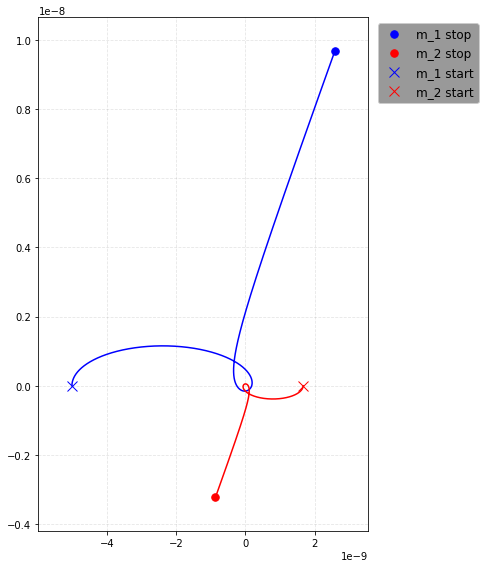

In [1]:
%run ./Functions_PM_Irvin.ipynb

m_1 = 1
m_2 = 3

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-1000, 0.])
x_2 = np.array([0.,   0.])
v_1 = np.array([0., 0.02])
v_2 = np.array([0.,    0])
s = x_1, x_2, v_1, v_2, m_1, m_2


t_max = 5e5
res = 1e5
dt = t_max/res

positions = run_model(s, t_max, dt, DL=True)
orbPlotter(positions, CM=True)



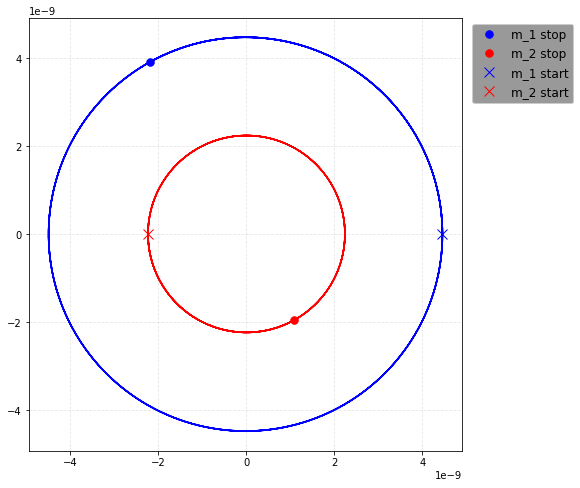

In [2]:
%run ./Functions_PM_Irvin.ipynb

m_1 = b1_mass = 1
m_2 = b2_mass = 2

R_S = 2*(b1_mass + b2_mass)*G/c**2

mass_bin = b1_mass + b2_mass
SMA_bin = 1000
v_redmass = np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2

t_max = 5e5
res = 1e5
dt = t_max/res

positions, momenta = run_model(s, t_max, dt, DL=True, return_momenta=True)
orbPlotter(positions, CM=True)

In [3]:
def V_1PM(x_1, x_2, p_1, p_2, m_1, m_2, E_1, E_2, DL):
    if DL == True:
        G, c = 1, 1
    else:
        c = const.c.value
        G = const.G.value
    r = rel_len(x_1, x_2)
    γ_1 = γ(v_1, DL)
    γ_2 = γ(v_2, DL)
    c_1 = -2*(c**2 - np.dot(p_1, p_2)/(γ_1*γ_2*m_1*m_2))**2 + (c**2 - np.dot(p_1, p_1)/(γ_1*m_1)**2)*(c**2 - np.dot(p_2, p_2)/(γ_2*m_2)**2)
    return (m_1*m_2)**2/(E_1*E_2)*G/r*c_1

pos1, pos2, posCM = positions
mom1, mom2 = momenta

E_1s = np.zeros(len(pos1[0]))
E_2s = np.zeros(len(pos1[0]))
Vs = np.zeros(len(pos1[0]))
for i in range(len(pos1[0])):
    x_1 = pos1[:,i]
    x_2 = pos2[:,i]
    p_1 = mom1[:,i]
    p_2 = mom2[:,i]
    E_1s[i] = E_1 = np.sqrt(m_1**2 + np.dot(p_1, p_1))
    E_2s[i] = E_2 = np.sqrt(m_2**2 + np.dot(p_2, p_2))
    Vs[i] = V_1PM(x_1, x_2, p_1, p_2, m_1, m_2, E_1, E_2, DL=True)



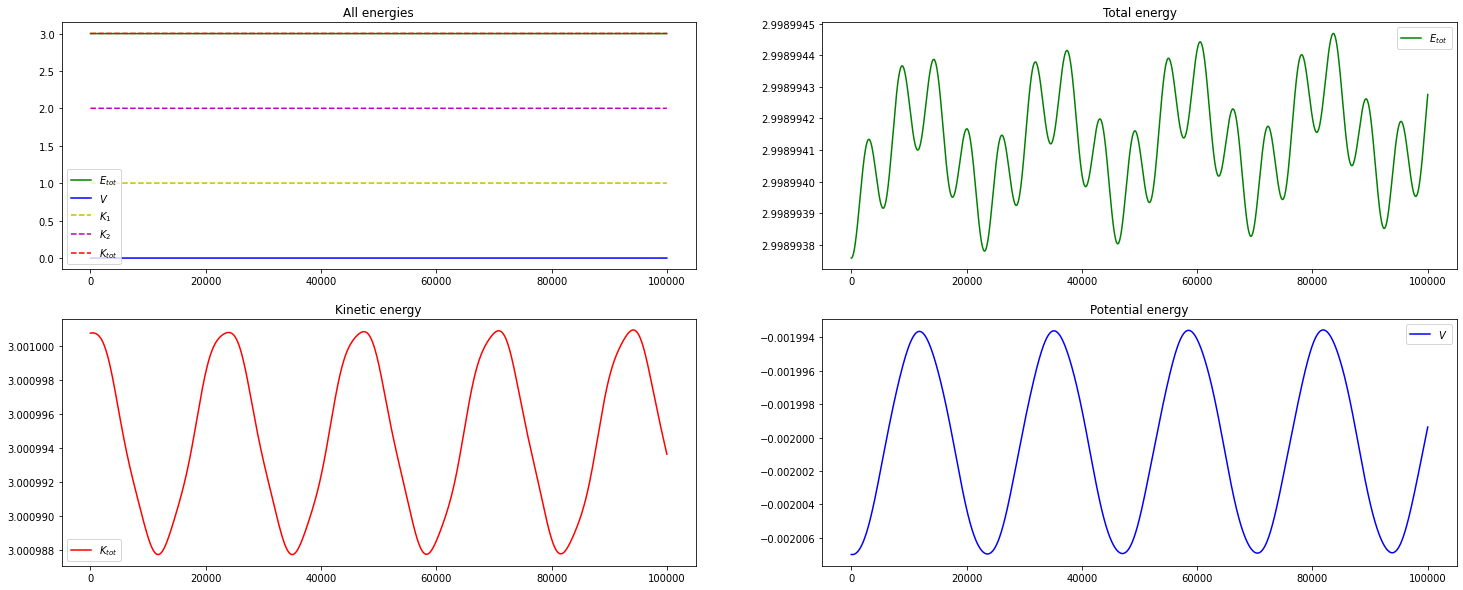

In [4]:
t = np.arange(len(E_1s))
K_tot = [E_1s[i] + E_2s[i] for i in range(len(E_1s))]
E_tot = [E_1s[i] + E_2s[i] + Vs[i] for i in range(len(E_1s))]

fig, axs = plt.subplots(2,2, figsize = (25,10))

axs[0,0].ticklabel_format(useOffset=False)
axs[0,0].plot(t, E_tot, 'g', label='$E_{tot}$')
axs[0,0].plot(t, Vs, 'b', label='$V$')
axs[0,0].plot(t, E_1s, 'y--', label='$K_1$')
axs[0,0].plot(t, E_2s, 'm--', label='$K_2$')
axs[0,0].plot(t, K_tot, 'r--', label='$K_{tot}$')
axs[0,0]. set_title('All energies')
axs[0,0].legend()

axs[0,1].ticklabel_format(useOffset=False)
axs[0,1].plot(t, E_tot, 'g', label='$E_{tot}$')
axs[0,1].set_title('Total energy')
axs[0,1].legend()

axs[1,0].ticklabel_format(useOffset=False)
# axs[1,0].plot(t, E_1s, 'y:', label='K_1')
# axs[1,0].plot(t, E_2s, 'm:', label='K_2')
axs[1,0].plot(t, K_tot, 'r', label='$K_{tot}$')
axs[1,0].set_title('Kinetic energy')
axs[1,0].legend()

axs[1,1].ticklabel_format(useOffset=False)
axs[1,1].plot(t, Vs, 'b', label='$V$')
axs[1,1].set_title('Potential energy')
axs[1,1].legend()
